In [1]:
import numpy as np
import pandas as pd
import math
import re
from nltk.corpus import stopwords
import seaborn as sns
import unidecode
from sklearn.utils import resample
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns 
warnings.filterwarnings('ignore')

In [5]:
df_bucket = pd.read_csv('bucket_model_result.csv')
df_bucket_comm = pd.read_csv('bucket_committee_model_result.csv')
df_sentiment = pd.read_csv('sent_model_result.csv')
df_sentiment_comm = pd.read_csv('sentiment_committee_model_result.csv')

### Active Learning Model Comparison

Variables we could explore
1. Model Name
2. Training method
3. if the training size is balanced
4. sampling size
5. sort by time
6. partition ratio

In [8]:
df_bucket.head()

,Unnamed: 0,model_name,training_method,balance,sampling_size,sort_by_time,partition_ratio,seed_size,unlabeled_size,test_size,val_score,accuracy,f1_score,precision,recall,specificity
0,1,Bernoulli Naive Bayes,random_sampling,True,0,True,"[0.5, 0.25, 0.25]",2062,1030,1032,0.753,0.734,0.760,0.693,0.843,0.626
1,2,Bernoulli Naive Bayes,random_sampling,True,0,True,"[0.6, 0.2, 0.2]",2474,824,826,0.768,0.718,0.757,0.665,0.877,0.559
2,3,Bernoulli Naive Bayes,random_sampling,True,0,True,"[0.8, 0.1, 0.1]",3298,412,414,0.721,0.754,0.780,0.704,0.874,0.633
3,4,Bernoulli Naive Bayes,random_sampling,True,0,False,"[0.5, 0.25, 0.25]",2062,1030,1032,0.756,0.805,0.804,0.811,0.797,0.814
4,5,Bernoulli Naive Bayes,random_sampling,True,0,False,"[0.6, 0.2, 0.2]",2474,824,826,0.725,0.805,0.801,0.818,0.785,0.826


In [9]:
model_stats = ['val_score', 'accuracy', 'f1_score', 'precision', 'recall', 'specificity']

In [ ]:
df_bucket.groupby('')

In [18]:
x = np.array(model_spec_lst)[:, 0]
y = np.array(model_spec_lst)[:, 1]
z = np.array(model_result_lst)
d = np.dstack([x,y,z])[0]
model_df = pd.DataFrame(d, columns=['instances', 'iteration', 'model_score'])

In [20]:
model_df.head()

,instances,iteration,model_score
0,2.0,1.0,0.786
1,2.0,2.0,0.800
2,2.0,3.0,0.803
3,2.0,4.0,0.799
4,2.0,5.0,0.794


<AxesSubplot:>

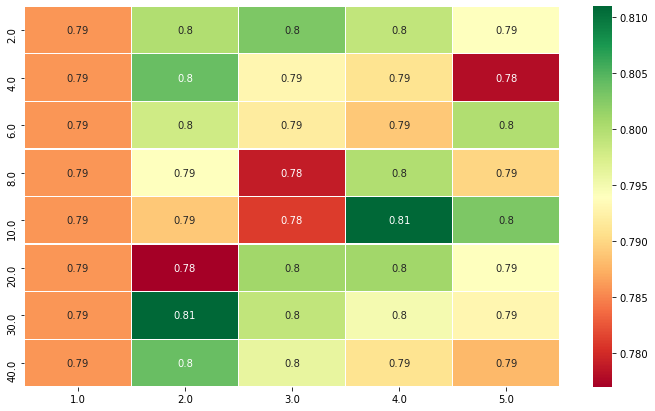

In [21]:
ins_set = set(model_df['instances'])
iter_set = set(model_df['iteration'])
score = np.array(model_df['model_score']).reshape([len(instances_lst), len(iteration_lst)])
idx_raw = list(ins_set)
idx_raw.sort()
idx = idx_raw
# Defining columns for the dataframe
cols = list(iter_set)
df = pd.DataFrame(score, columns = cols, index = idx)
# Defining figure size for the output plot 
fig, ax = plt.subplots(figsize = (12, 7))
# Displaying dataframe as an heatmap 
# with diverging colourmap as RdYlGn
sns.heatmap(df, cmap ='RdYlGn', linewidths = 0.30, annot = True)